## Objective
* I started my career path as a Data Scietist and working as this role can be intellectual challenging. I wonder whether a Data Scientist get paid well ? How much a Data Scientist salary ? What skills are needed to improve ? ... so It would be great to go through the data and answer my questions by myself. This is my motivation to start this project.

* For this part, I wil figure out : 
    * What is the expectations of the company on Data Science positions
    * What is the range of salary ?
    * Which skills are needed ?
    * The requirements on education level and working experience
    * Top industries with maximum data scientist position needed

## Data Description

* I see the data set on Kaggle that was collected from Glassdoor site in US _ *Glassdoor is a website where current and former employees anonymously review companies. Glassdoor also allows users to anonymously submit and view salaries as well as search and apply for jobs on its platform. https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor*

* Information about the data : 
    * Job Title: The title of job, eg. Data scientist, junior data scientist, senior data scientist etc.
    * Salary Estimate: Range of salary and the source.
    * Job Description: Tells us what is expected out of the job title.
    * Rating: It gives the rating of the company
    * Company Name: Name of the company
    * Location: Location of the job
    * Headquarters: location of headquarter of the company
    * Size: Range of number of employee working in the company
    * Founded: Company founded in Year
    * Type of ownership: Tells us if the company is private, public or government owned.
    * Industry: Industry of the company
    * Sector: Sector in which company works
    * Revenue: Total revennue of the company per year
    * Competitors: Current competitor of the company in the same sector
    * Hourly - Tells us if the salary reported was hourly or yearly. 1: Hourly, 0: not hourly.
    * Employer provided: 1: If the salary was provided by the employee of the company, 0: otherwise.
    * Lower Salary: Lower salary reported for the job in a particular company.
    * Uppr Salary: Upper salary reported for the job in a particular company.
    * Avg Salary(K): Average of Lower and Upper salary yearly. K is the unit of the column, it means 1000 (U.S. dollars.)
    * company_txt: It contains the name of the company.
    * Multiple skill columns (python, spark, aws, excel etc): 1: Skill is required by the company, 0: It is not required.
    * Jobtitle_sim: It contains the title of the job like Data scientist, ML engineer etc.
    * seniority_by_title: Senority of the position, it is extracted from the Job Title.
    * Degree: If the job description mention that the company gives experience credit for a master(M) or Ph.D degree(P)

    

## 1. Data Preparation


In [2]:
# Source: https://www.kaggle.com/code/nikhilbhathi/100-insights-data-science-jobs-eda/notebook
# Importing all the neccessary libraries

import pandas as pd # To load files and perform tasks
import numpy as np # linear algebra
import seaborn as sns  # data visualizations
import matplotlib.pyplot as plt # data visualizations
#import plotly  #  interactive plotting library 

In [3]:
# Loading the dataset into the pandas dataframe (cleaned dataset)

df = pd.read_csv("E:/ThanhTam_DA/Project/Prediction/Data Scientist Salary/data_cleaned.csv")
df = df.drop("index",axis=1) # I droped the 'index' column because I don't need it.

In [43]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [44]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [53]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'others'
    
# Get dummy variables
# 'Size' (under 1000 employees is small business), (from 1000-5000 is mid-size), (5000> large)
def size_classifier(size):
    if '10000+' in size.lower():
        return 'large'
    elif '5001 - 10000' in size.lower():
        return 'large'
    elif '501 - 1000' in size.lower():
        return 'mid'
    elif '201 - 500' in size.lower():
        return 'small'
    elif '51 - 200' in size.lower():
        return 'small'
    elif '1001 - 5000' in size.lower():
        return 'mid'
    else:
        return 'na'
    
# source https://penpoin.com/business-size/
def revenue_classifier(revenue):
    if '$1 to $2 billion (USD)' in revenue.lower():
        return 'large'
    elif '$1 to $5 million (USD)' in revenue.lower():
        return 'small'
    elif '$10 to $25 million (USD)' in revenue.lower():
        return 'small'
    elif '$10+ billion (USD)' in revenue.lower():
        return 'large'
    elif '$100 to $500 million (USD)' in revenue.lower():
        return 'mid'
    elif '$2 to $5 billion (USD)' in revenue.lower():
        return 'large'
    elif '$25 to $50 million (USD)' in revenue.lower():
        return 'mid'
    elif '$5 to $10 billion (USD)' in revenue.lower():
        return 'large'
    elif '$5 to $10 million (USD)' in revenue.lower():
        return 'small'
    elif '$50 to $100 million (USD)' in revenue.lower():
        return 'mid'
    elif '$500 million to $1 billion (USD)' in revenue.lower():
        return 'mid'
    else:
        return 'na'

In [52]:
df['size'] = df['Size'].apply(size_classifier)

In [46]:
df['job_title_sim'] = df['Job Title'].apply(title_simplifier)

In [47]:
df.groupby("job_title_sim")["job_title_sim"].count()

job_title_sim
analyst           102
data engineer     119
data scientist    279
director           14
manager            22
mle                22
others            184
Name: job_title_sim, dtype: int64

In [11]:
# Lets look at the shape of the dataset

print("No. of rows :",df.shape[0])
print("No. of columns :",df.shape[1])

No. of rows : 742
No. of columns : 43


In [12]:
# Scanning the dataset for missing values.

df.isnull().sum() # no missing values

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
desc_len        

In [13]:
# Looking at some overall information and statistics about the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

## 2. Eploration Data Analysis (EDA)

In [14]:
# Provide a summary of the numerical information...

df.describe()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,...,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,...,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


* The average salary is $\$$102k and the median is $\$$98k (It doesn't look like the salary is affected much by outliers)
* 75% jobs offer the lower salary from $\$$91k and the upper salary from $\$$155k 
* The minimum range salary from $\$$15k to $\$$16k and the maximum salary range from $\$$202k to $\$$306k 

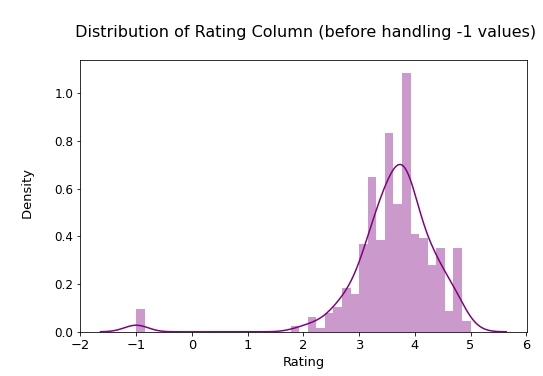

In [14]:
# Lets look at how the 'Rating' column is distributed:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (before handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df.Rating,color="purple")
plt.show()

In [15]:
# It follows a normal distribution, therefore we can replace -1 values with the mean of the distribution.
# Replacing the -1 values in 'Rating' column with nan value.

df["Rating"] = df["Rating"].apply(lambda x: np.nan if x==-1 else x)

# Fill missing values with the mean of the distribution.

df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

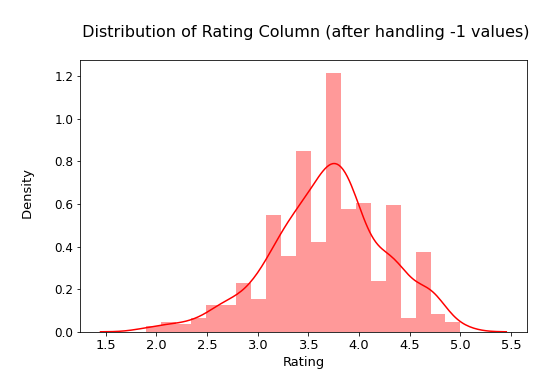

In [16]:
# Verifying that the replace function worked properly for the 'Rating' column.

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (after handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df["Rating"],kde=True,color="red")
plt.show()

* Most of companies is rated ~ 3.7

### 2.1 States with most number of jobs

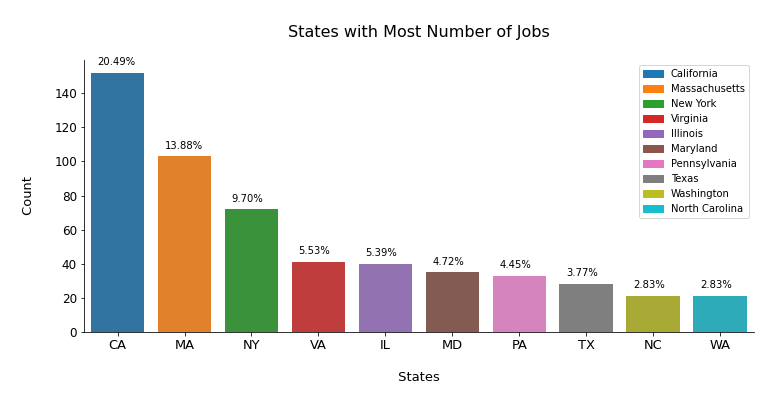

In [16]:
#Adding labels for the states
lab=["California","Massachusetts","New York","Virginia","Illinois","Maryland","Pennsylvania","Texas","Washington","North Carolina"]
#-----
from IPython.core.pylabtools import figsize
#Lets look at the top 10 states with the most number of job postings.

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x=df["Job Location"].value_counts().index[0:10], y = df["Job Location"].value_counts()[0:10])
#---------
#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["Job Location"].value_counts().index[0:10]
for p in ax.patches:
    ax.text(p.get_x() + 0.1, p.get_height()+4.5, '{:.2f}%'.format((p.get_height()/742)*100))
#------
#Beautifying the plot
plt.title('\n States with Most Number of Jobs \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches, loc="upper right")
plt.show()

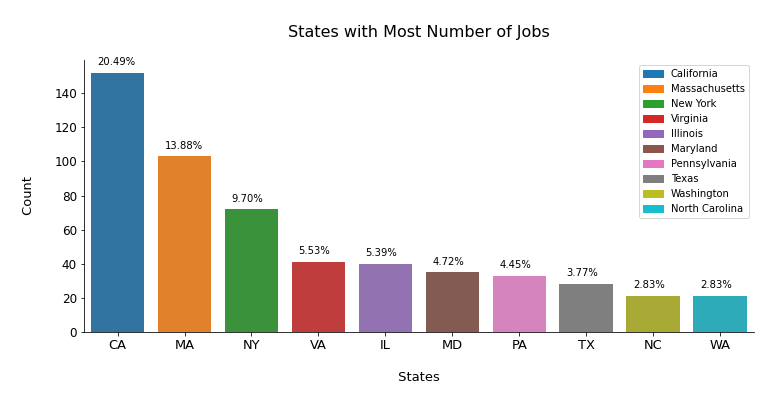

In [18]:


fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x=df["Job Location"].value_counts().index[0:10], y = df["Job Location"].value_counts()[0:10])
sns.despine(bottom = False, left = False)
for p in ax.patches:
    ax.text(p.get_x() + 0.1, p.get_height()+4.5, '{:.2f}%'.format((p.get_height()/742)*100))
    
#Beautifying the plot
plt.title('\n States with Most Number of Jobs \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches, loc="upper right")
plt.show()


* California has the most number of jobs.
* It is obvious for California to have most number of jobs as it is a hub for Tech. companies and has silicon valley. Calfornia, Massachusetts, New York, Virginia together has around 50% jobs
* Massachusetts on 2nd rank is no surprise, according to latest edition of the Milken Institute’s State and Technology Index, it has now become the tech state of US. Source: https://www.geekwire.com/2020/chart-new-report-ranks-top-states-tech/
* One surprising thing is, despite having the largest number of Fortune 500 companies HQ in New York, it is still on 3rd position.

## 2.2 Range Salary in different states

In [23]:
# Making a dataframe with only 3 columns: Job Location, Lower Salary and Upper Salary.

a=df.groupby("Job Location")["Lower Salary","Upper Salary"].mean().reset_index()
a.head()

,Job Location,Lower Salary,Upper Salary
0,AL,40.875000,75.000000
1,AZ,65.777778,105.555556
2,CA,92.427632,154.598684
3,CO,64.272727,108.090909
4,CT,57.600000,84.600000


In [24]:
#Making a sorter, to sort the dataframe according to the states which contains maximum number of jobs.

sorter = df["Job Location"].value_counts().index

In [25]:
# Converting Job Location column as Category and setting the sorter.
# Thanks to Stackoverflow. Source = https://stackoverflow.com/questions/23482668/sorting-by-a-custom-list-in-pandas

a["Job Location"] = a["Job Location"].astype("category")
a["Job Location"].cat.set_categories(sorter, inplace=True)

#Resetting and droping the index

a = a.sort_values(["Job Location"]).reset_index()
a = a.drop("index",axis=1)

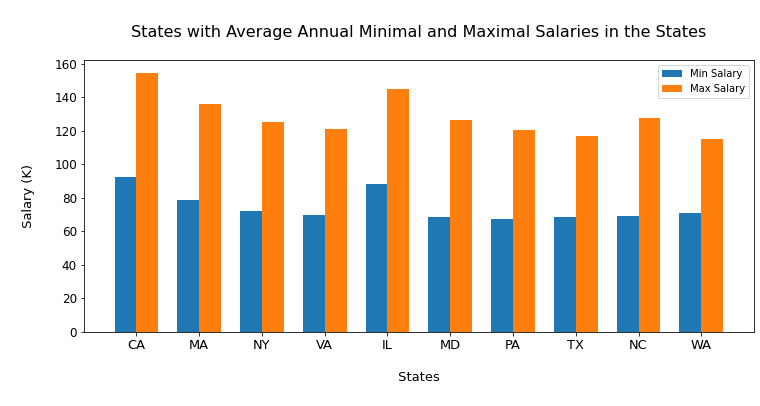

In [26]:
# Drawing the grouped bar plot.

lab=[]
for i in sorter[0:10]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, a["Lower Salary"][0:10], width, label='Min Salary')
rects2 = ax.bar(x + width/2, a["Upper Salary"][0:10], width, label='Max Salary')

#Beautifying the plot
plt.title('\n States with Average Annual Minimal and Maximal Salaries in the States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')

ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend()
plt.show()

* State with highest number of job, California also offers the highest average maximal annual salary, followed by Illinois.
* Both California and Illinois has almost the same average minimal annual salary.
* Pennsylvania has the lowest average minimum annual salary among the top 10 states.
* Washington has the lowest average maximum annual salary among the top 10 states.

### 2.3  Top 5 Industries with Maximum Number of Data Science Related Job Postings

In [27]:
#Lets see how many industries we have in the dataset.

df["Industry"].nunique()

60

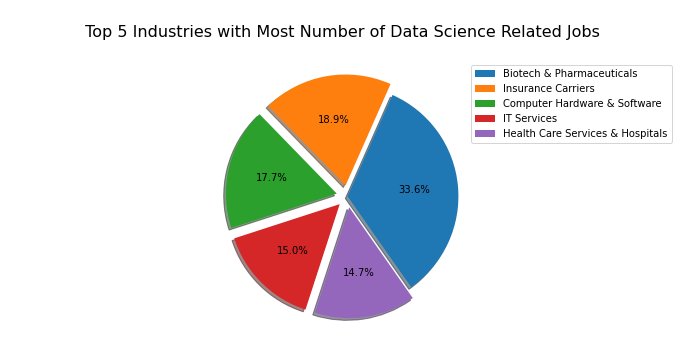

In [28]:
#Plotting pie chart

my_explode=(0,0.1,0.1,0.1,0.1)
labels= [x for x in df["Industry"].value_counts().sort_values(ascending=False)[0:5].index] # piechart for only top 5 industry
patches,ax, text= plt.pie(df["Industry"].value_counts().sort_values(ascending=False)[0:5],autopct='%1.1f%%',explode=my_explode,shadow=True,startangle=305)
plt.title('\n Top 5 Industries with Most Number of Data Science Related Jobs \n', size=16, color='black')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

* **Biotech & Pharmaceuticals Industry** has maximum number of jobs followed by Insurance carriers.
* As a surprise, **IT** industry has fewer jobs for data science related roles.
* More than 65% data science related jobs lie in top 10 industries.
* For this dataset, **Biotech & Pharmaceuticals Industry** has twice the amount of jobs compared to **IT** services industry.
* It looks like **Heath Care Services & Hospitals** industry is hiring at a good rate because they almost surpassed the **IT** services industry.

### 2.4. The minimum and maximum average salary for top 5 industries.

In [32]:
# Making a sorter, to sort the index with Industries having highest number of data science related jobs

sort_ind = df["Industry"].value_counts().sort_values(ascending=False).index

In [45]:
#Making a DF and sortring by industry

ind = df.groupby("Industry")["Lower Salary","Upper Salary"].mean().sort_values("Industry",ascending=False)
ind = ind.reset_index()

# Converting Industry column as Category and setting the sorter.

ind["Industry"] = ind["Industry"].astype("category")
ind["Industry"].cat.set_categories(sort_ind, inplace=True)

#Resetting and droping the index

ind = ind.sort_values(["Industry"]).reset_index()
ind = ind.drop("index",axis=1)
ind.head()

,Industry,Lower Salary,Upper Salary
0,Telecommunications Manufacturing,31.000000,57.000000
1,Social Assistance,32.666667,63.666667
2,Gambling,35.000000,62.000000
3,Architectural & Engineering Services,36.000000,65.000000
4,Food & Beverage Manufacturing,39.500000,67.000000


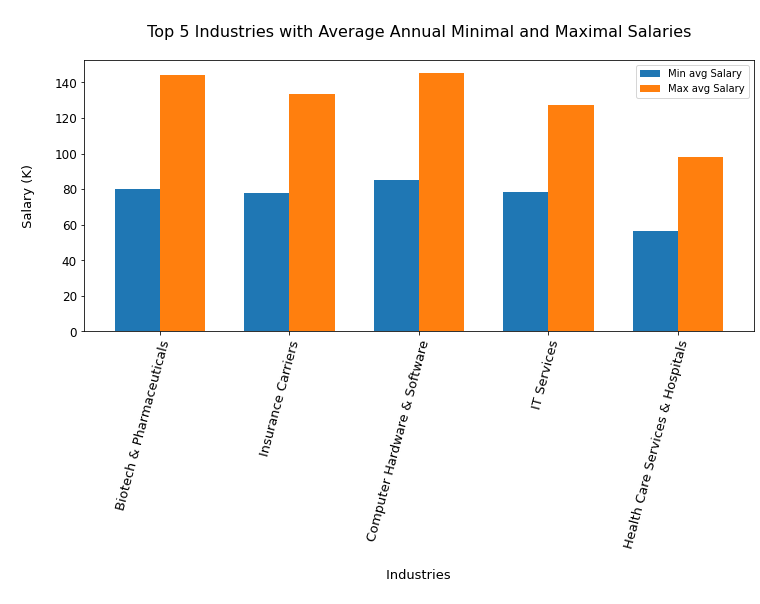

In [42]:
# Drawing the grouped bar plot.

lab=[]
for i in sort_ind[0:5]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ind["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ind["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Industries with Average Annual Minimal and Maximal Salaries \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=75,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Industries \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

* **Computer Hardware & Software Industry** has the **highest** average maximal salary among the 5 selected industries, it is followed by **Biotech & Pharmaceuticals**.
* **Computer Hardware & Software Industry** also has the highest average minimal salary among the 5 selected industries, it is followed by **Biotech & Pharmaceuticals**.
* **Health Care Services & Hospitals industry** has the **lowest** average maximal and minimal salary among the 5 selected industries.

### 2.5 Job Titles with Most Number of Jobs

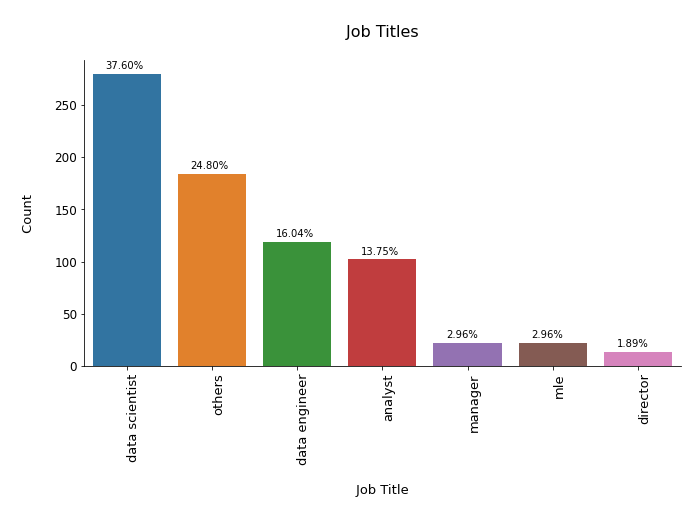

In [103]:
# Looking at the most in demand job titles.

catp = sns.catplot(x="job_title_sim",data=df,order=df.job_title_sim.value_counts().index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = df.job_title_sim.value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

#Beautifying the plot

plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#na shows those titles other than the titles shown in the plot

* A large number of job postings are for Data Scientist, followed by other scientists (research scientists, consultants etc) and data engineer.
* Data scientist, data engineer and data analyst accounts for around 72% of the postings.
* High level position are in low demand. It will be interesting to see who gets paid more.

In [108]:
# Lets take a look at how these job positions are getting paid with respect to different seniority levels.
#Drawing a pivot table.
pd.pivot_table(df,index=["job_title_sim","seniority_by_title"],values="Avg Salary(K)").sort_values("Avg Salary(K)",ascending=False)

Avg Salary(K)
job_title_sim  seniority_by_title               
director       na                     168.607143
mle            sr                     142.071429
data scientist sr                     138.956522
data engineer  sr                     124.689189
mle            na                     119.133333
others         sr                     109.061404
data scientist na                     107.043011
               jr                     106.500000
data engineer  na                      96.701220
manager        na                      84.022727
analyst        sr                      80.129630
others         na                      78.783465
analyst        na                      61.308219
               jr                      53.250000

* As expected, director got the highest salary and followed by Senior ML Engineer 
* Senior data scientist got the slightly higher paid compared to data engineer 
* And if start as the junior data analyst received the lowest salary.

*Note 'na' means the job seniority level was not mentioned in the job description*

### 2.6 Relation between Average Salary and Education

In [113]:
pd.pivot_table(df, index = 'job_title_sim', columns = "Degree", values = 'Avg Salary(K)', aggfunc = ['mean','count']).rename(columns={"mean":"Avg Salary(K)"})

Avg Salary(K)                           count        \
Degree                     M           P not required      M     P   
job_title_sim                                                        
analyst            61.333333         NaN    67.860000   27.0   NaN   
data engineer     103.714286  132.250000   105.469512   35.0   2.0   
data scientist    117.189076  130.378788   114.586614  119.0  33.0   
director          198.900000  168.200000   131.250000    5.0   5.0   
manager            79.428571         NaN    86.166667    7.0   NaN   
mle               125.000000  134.200000   118.950000    2.0  10.0   
others             98.035088   99.298246    71.057143   57.0  57.0   

                             
Degree         not required  
job_title_sim                
analyst                75.0  
data engineer          82.0  
data scientist        127.0  
director                4.0  
manager                15.0  
mle                    10.0  
others                 70.0

* Most of the companies has mentioned Masters degree in their job descriptions.
* For companies that mentioned a PhD degree in their job description, they offered much highes average annual salary as compared to Masters.

## 3. Data for Modelling

In [62]:
dt.corr()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Rating,1.000000,0.107388,-0.050105,0.064985,0.161054,0.107939,0.131463,-0.075948,0.164219,0.155967,...,0.084049,0.053948,0.121310,0.095173,0.150325,0.024956,0.021204,0.054054,0.022220,-0.044425
Founded,0.107388,1.000000,0.049313,-0.312761,-0.033732,0.007169,-0.009609,0.139165,0.103183,0.066978,...,0.005844,0.019728,0.022332,0.040374,0.025715,0.060605,0.055393,0.038379,0.058025,0.044355
Hourly,-0.050105,0.049313,1.000000,0.124748,-0.197587,-0.269446,-0.243771,0.007847,-0.193487,-0.098530,...,-0.036872,-0.043062,-0.051221,-0.059934,-0.081895,-0.053132,-0.052237,-0.021369,-0.041884,-0.025354
Employer provided,0.064985,-0.312761,0.124748,1.000000,0.189375,0.029831,0.096133,-0.110649,-0.107924,-0.082524,...,-0.030882,-0.036067,-0.042900,-0.050198,-0.068592,-0.008810,-0.043751,-0.017898,-0.035080,-0.021235
Lower Salary,0.161054,-0.033732,-0.197587,0.189375,1.000000,0.939995,0.978679,0.003010,0.326078,0.164245,...,0.099196,0.049714,0.178374,0.147471,0.093147,-0.049153,-0.026770,0.074627,0.057677,-0.118053
Upper Salary,0.107939,0.007169,-0.269446,0.029831,0.939995,1.000000,0.990032,0.034607,0.300576,0.170892,...,0.124101,0.040261,0.173760,0.164820,0.119785,-0.090469,-0.055548,0.091450,0.078266,-0.123877
Avg Salary(K),0.131463,-0.009609,-0.243771,0.096133,0.978679,0.990032,1.000000,0.022076,0.315552,0.170678,...,0.115658,0.044759,0.178237,0.160098,0.110562,-0.074753,-0.044491,0.085859,0.070925,-0.123306
Age,-0.075948,0.139165,0.007847,-0.110649,0.003010,0.034607,0.022076,1.000000,-0.098626,-0.102418,...,-0.065947,-0.039562,-0.081608,-0.055830,-0.053311,-0.055828,0.020544,-0.058273,0.044605,-0.058240
Python,0.164219,0.103183,-0.193487,-0.107924,0.326078,0.300576,0.315552,-0.098626,1.000000,0.347619,...,0.190566,0.113676,0.254331,0.209430,0.235114,0.154118,0.167770,0.063615,0.080035,-0.027705
spark,0.155967,0.066978,-0.098530,-0.082524,0.164245,0.170892,0.170678,-0.102418,0.347619,1.000000,...,0.107790,0.032138,0.271394,0.237612,0.537081,-0.018655,-0.044026,0.216880,0.232356,-0.051017


In [57]:
# drop columns that we wont use
df_drop = df.drop(["Job Title","Size","Lower Salary","Upper Salary","Founded","Company Name","Salary Estimate","Job Description","Location","Headquarters","Competitors","company_txt"],axis=1) 

In [58]:
df_drop.isnull().sum()

Rating                0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Hourly                0
Employer provided     0
Avg Salary(K)         0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
desc_len              0
num_comp              0
size                  0
dtype: int64

In [56]:
df_drop.groupby("size")["size"].count()

size
large    206
mid      284
na        41
small    211
Name: size, dtype: int64

In [38]:
df_drop['revenue'] = df_drop['Revenue'].apply(revenue_classifier)

In [41]:
df_drop.head()

,Rating,Size,Type of ownership,Industry,Sector,Revenue,Hourly,Employer provided,Lower Salary,Upper Salary,...,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,desc_len,num_comp,revenue
0,3.8,501 - 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,53,91,...,1,0,0,0,data scientist,na,M,2536,0,na
1,3.4,10000+,Other,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,63,112,...,0,0,0,0,data scientist,na,M,4783,0,na
2,4.8,501 - 1000,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,80,90,...,0,0,0,0,data scientist,na,M,3461,0,na
3,3.8,1001 - 5000,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,56,97,...,0,0,0,0,data scientist,na,not required,3883,3,na
4,2.9,51 - 200,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,86,143,...,0,0,0,0,data scientist,na,not required,2728,3,na


In [60]:
# lower name of columns
df_drop.columns= df_drop.columns.str.lower()

In [61]:
# get data
df_model = df_drop.to_csv('E:/ThanhTam_DA/Project/Prediction/Data Scientist Salary/data_model.csv')

#### Now I will use R program for modelling